# Functional API

The functional API of `medchem` provides an easy and uniform way to access most the `medchem` alerts, filters and rules proposed in the other `medchem` module.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import datamol as dm
import pandas as pd

import medchem as mc

## Generic filters

All the filters can be applied on a list of SMILES or molecule objects. It's also possible to run the filtering in parallel in processes or threads.

### `macrocycle_filter`

`medchem.functional.macrocycle_filter` will flag any molecules from which the maximum cycle size is bigger than a threshold.

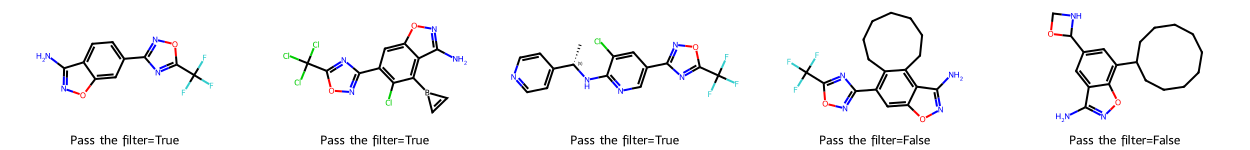

In [9]:
smiles_list = [
    # none
    "Nc1noc2cc(-c3noc(C(F)(F)F)n3)ccc12",
    "Nc1noc2cc(-c3noc(n3)C(Cl)(Cl)Cl)c(Cl)c(B3C=C3)c12",
    "C[C@H](Nc1ncc(-c2noc(C(F)(F)F)n2)cc1Cl)c1ccncc1",
    "NC1=NOC2=CC(C3=NOC(=N3)C(F)(F)F)=C3CCCCCCCC3=C12",
    "Nc1noc2c(cc(cc12)C1NCO1)C1CCCCCCCCC1",
]
mols = [dm.to_mol(s) for s in smiles_list]

# Apply the filter
out = mc.functional.macrocycle_filter(mols, max_cycle_size=7, return_idx=False)

legends = [f"Pass the filter={o}" for o in out]
dm.to_image(mols, legends=legends, n_cols=5, mol_size=(250, 150))

### `atom_list_filter`

Find molecules without any atom from a set of unwanted atomic symbols and with all atoms in the set of wanted atom list.

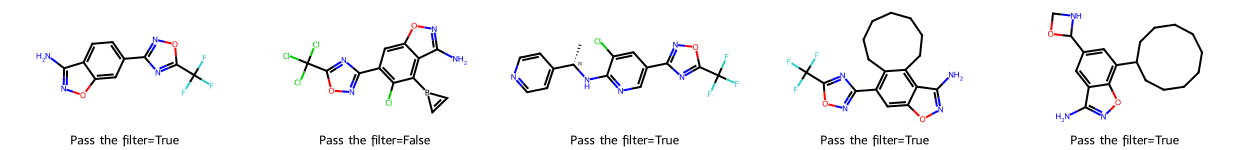

In [11]:
smiles_list = [
    "Nc1noc2cc(-c3noc(C(F)(F)F)n3)ccc12",
    "Nc1noc2cc(-c3noc(n3)C(Cl)(Cl)Cl)c(Cl)c(B3C=C3)c12",
    "C[C@H](Nc1ncc(-c2noc(C(F)(F)F)n2)cc1Cl)c1ccncc1",
    "NC1=NOC2=CC(C3=NOC(=N3)C(F)(F)F)=C3CCCCCCCC3=C12",
    "Nc1noc2c(cc(cc12)C1NCO1)C1CCCCCCCCC1",
]
mols = [dm.to_mol(s) for s in smiles_list]

# Apply the filter
out = mc.functional.atom_list_filter(mols, unwanted_atom_list=["B"], return_idx=False)

legends = [f"Pass the filter={o}" for o in out]
dm.to_image(mols, legends=legends, n_cols=5, mol_size=(250, 150))


### `ring_infraction_filter`

Find molecules that have a ring infraction filter. This filter focuses on checking for rings that are too small to have an heteroatom.

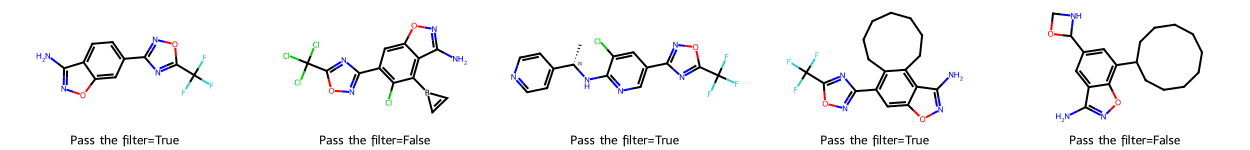

In [14]:
smiles_list = [
        "Nc1noc2cc(-c3noc(C(F)(F)F)n3)ccc12",
        "Nc1noc2cc(-c3noc(n3)C(Cl)(Cl)Cl)c(Cl)c(B3C=C3)c12",
        "C[C@H](Nc1ncc(-c2noc(C(F)(F)F)n2)cc1Cl)c1ccncc1",
        "NC1=NOC2=CC(C3=NOC(=N3)C(F)(F)F)=C3CCCCCCCC3=C12",
        "Nc1noc2c(cc(cc12)C1NCO1)C1CCCCCCCCC1",
    ]
mols = [dm.to_mol(s) for s in smiles_list]

# Apply the filter
out = mc.functional.ring_infraction_filter(mols, hetcycle_min_size=4, return_idx=False)

legends = [f"Pass the filter={o}" for o in out]
dm.to_image(mols, legends=legends, n_cols=5, mol_size=(250, 150))


### `num_atom_filter`

Find molecules that match the number of atom range constraints.

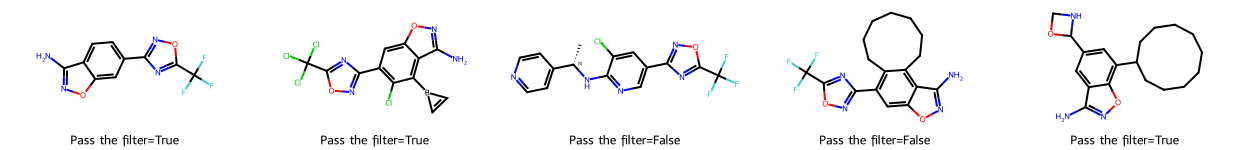

In [24]:
smiles_list = [
    "Nc1noc2cc(-c3noc(C(F)(F)F)n3)ccc12",
    "Nc1noc2cc(-c3noc(n3)C(Cl)(Cl)Cl)c(Cl)c(B3C=C3)c12",
    "C[C@H](Nc1ncc(-c2noc(C(F)(F)F)n2)cc1Cl)c1ccncc1",
    "NC1=NOC2=CC(C3=NOC(=N3)C(F)(F)F)=C3CCCCCCCC3=C12",
    "Nc1noc2c(cc(cc12)C1NCO1)C1CCCCCCCCC1",
]
mols = [dm.to_mol(s) for s in smiles_list]

# Apply the filter
out = mc.functional.num_atom_filter(mols, min_atoms=0, max_atoms=25, return_idx=False)

legends = [f"Pass the filter={o}" for o in out]
dm.to_image(mols, legends=legends, n_cols=5, mol_size=(250, 150))


## Medchem API

In [3]:
print("dsds")

dsds
